In [28]:
import numpy as np
import meep as mp
import matplotlib.pyplot as plt

In [62]:
# L5 cavity 生成
def unit_1(a, ny, nx, x_offset, y_offset, cavity, barrier, wgi, hole_shift):
	y_shift = a*np.sqrt(3)/2 # 0.3464
	x_shift = a
	wgi_shift = (wgi-1)*a*np.sqrt(3)
	output = list()
	y_center = y_offset - ny * y_shift
	x_center = x_offset - nx * x_shift / 2

	for j in range(ny+1):
		for i in range(nx+1):
			if 2*j == ny and abs(2*i - nx ) <= cavity - 1: #中央のcavityを作製
				continue
			elif 2*j == ny - (barrier + 1) and 2*i <= nx - cavity - barrier - 6: #結合導波路 左（バリア領域の長さが奇数のとき）
				continue
			elif 2*j == ny + (barrier + 1) and 2*i >= nx + cavity + barrier + 6: #結合導波路 右（バリア領域の長さが奇数のとき）
				continue
			else:
				if 2*j == ny and abs(2*i - nx ) == cavity + 1: #両脇のcavityの穴シフト
					x = x_center + x_shift*i + hole_shift*a*(2*i - nx)/abs(2*i - nx)
				else:
					x = x_center + x_shift*i
				if 2*j < ny - (barrier + 1) and 2*i <= nx - cavity - barrier - 6 + 1: #結合導波路 左 を (wgi-1)だけ下にシフト
					y = y_center + 2*y_shift *j - wgi_shift
				elif 2*j > ny + (barrier + 1) and 2*i >= nx + cavity + barrier + 6 - 1:#結合導波路 右 を (wgi-1)だけ上にシフト
					y = y_center + 2*y_shift *j + wgi_shift
				else:
					y = y_center + 2*y_shift *j
				output.append([x,y])

	for j in range(ny):
		for i in range(nx):
			if 2*j == ny - (barrier + 2) and 2*i <= nx - cavity - barrier - 6: #結合導波路 左（バリア領域の長さが偶数のとき）
				continue
			elif 2*j == ny + barrier and 2*i >= nx + cavity + barrier + 4: #結合導波路 右（バリア領域の長さが偶数のとき）
				continue
			else:
				x = x_center + x_shift/2 + x_shift*i
				if 2*j < ny - (barrier + 2) and 2*i <= nx - cavity - barrier - 6 + 1: #結合導波路 左 を (wgi-1)だけ下にシフト
					y = y_center + y_shift + 2*y_shift *j - wgi_shift
				elif 2*j > ny + barrier and 2*i >= nx + cavity + barrier + 4 - 1:
					y = y_center + y_shift + 2*y_shift *j + wgi_shift
				else:
					y = y_center + y_shift + 2*y_shift *j
				output.append([x,y])
	return output

In [68]:
a=1

nx=10
ny=20
cavity = 5
barrier = 2
wgi = 1.1
hole_shift = 0.2

x_offset = 0
y_offset = 0

In [69]:
tmp = np.array(unit_1(a, nx, ny, x_offset, y_offset, cavity, barrier, wgi, hole_shift))

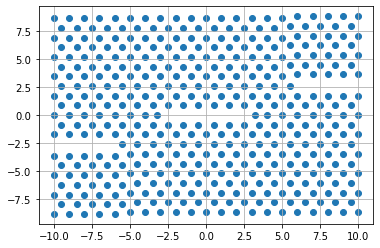

In [70]:
plt.scatter(tmp[:,0],tmp[:,1])
plt.grid(True)

In [76]:
tmp[6][1]

-8.660254037844386